In [1]:
# Import Important Libraries
import sklearn
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
import numpy as np
# import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy.polynomial.polynomial as poly
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
%matplotlib inline
%matplotlib inline

In [2]:
df = pd.read_csv('csgo_round_snapshots.csv',header = 0)
df = df.dropna()


In [3]:
#Extract our weapons features
weapons_ct = df.loc[:, 'ct_weapon_ak47':'ct_weapon_tec9':2]
weapons_t = df.loc[:, 't_weapon_ak47':'t_weapon_tec9':2]


#Compile list of costs for each weapon
cost_list = np.array([2700,3300,4750,1400,500,400,2050,5000,1800,200,5200,2900,3100,1050,1300,1500,1500,1250,1700,1050,2350,600,1100,5000,3000,1700,1200,2000,700,500,200,300,200,500])
cost_list = np.transpose(cost_list)
#Calculate total weapon costs for T and CT
total_cost_ct = np.dot(weapons_ct,cost_list)
total_cost_t = np.dot(weapons_t,cost_list)


In [4]:
df_NW = df.drop(df.iloc[:, 16:84], axis = 1)
df_NW.insert(17,"Total Weapon Cost T", np.transpose(total_cost_t))
df_NW.insert(17,"Total Weapon Cost CT", np.transpose(total_cost_ct))

In [5]:

df_NW["round_winner"] = np.where(df_NW.round_winner ==  "CT", 1, 0)
df_NW["bomb_planted"] = np.where(df_NW.bomb_planted ==  "True", 1,0)

df_dust2 = df_NW.loc[df_NW["map"] == "de_dust2"]
df_inferno = df_NW.loc[df_NW["map"] == "de_inferno"]
df_nuke = df_NW.loc[df_NW["map"] == "de_nuke"]
df_mirage = df_NW.loc[df_NW["map"] == "de_mirage"]
df_overpass = df_NW.loc[df_NW["map"] == "de_overpass"]
df_vertigo = df_NW.loc[df_NW["map"] == "de_vertigo"]
df_train  = df_NW.loc[df_NW["map"] == "de_train"]
df_lst = [df_dust2,df_inferno,df_nuke,df_mirage,df_overpass,df_vertigo,df_train]

In [6]:

def logreg_l1(c_lst, data_lst):
   
    for dataf in df_lst:
        curr_map = dataf.iloc[0,dataf.columns.get_loc('map')]
        plt.clf()
        acc_train_logreg = []
        acc_test_logreg = []
        c_logreg = []   
        w = []
        for c in c_lst:
                logreg = LogisticRegression(penalty = 'l1',C=c, solver = 'saga')

                

                Y = np.array(dataf.loc[:, dataf.columns == 'round_winner'])

                df = dataf.drop(["map","round_winner"], axis = 1)


                Y=Y.astype(float)
                scaler = preprocessing.StandardScaler()
                X_scale = scaler.fit_transform(df)
                X_scale=X_scale.astype(float)


                X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=30)
                Y_train = Y_train.reshape(Y_train.shape[0],)
                Y_test = Y_test.reshape(Y_test.shape[0],)

                logreg.fit(X_train, Y_train)
                weights = logreg.coef_
                w.append(np.sqrt(np.sum(np.square(weights))))

                
                
                Yhat_train= logreg.predict(X_train)
                Yhat_test = logreg.predict(X_test)

                # Find the accuracy achieved on training set using logreg.score and y_train as type of int
                acc_train = accuracy_score(Y_train,Yhat_train)
                print("Accuracy on training data = %f" % acc_train)
                acc_train_logreg.append(acc_train)

                acc_test = accuracy_score(Y_test,Yhat_test)
                print("Accuracy on testing data = %f" % acc_test)
                acc_test_logreg.append(acc_test)
                c_logreg.append(c)

        plt.plot(c_logreg, acc_train_logreg)
        plt.plot(c_logreg, acc_test_logreg)

        plt.title("Testing vs Training Accuracy L1 Regularization: %s" % curr_map)
        plt.xlabel("c")
        plt.ylabel("accuracy")

                # Use the following function to have a legend
        plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
        plt.savefig("LogReg L1 Reg %s" % curr_map)
        plt.show()
        
        plt.plot(c_logreg, w)
        plt.title("Regularization vs. Magnitude of w, L1 %s" % curr_map)
        plt.xlabel("c")
        plt.ylabel("Magnitude of Weights")
        plt.savefig("Regularization vs. Magnitude of w, L1 %s" % curr_map, format = 'png')
        plt.show()
        


Accuracy on training data = 0.541847
Accuracy on testing data = 0.539559
Accuracy on training data = 0.740005
Accuracy on testing data = 0.744400
Accuracy on training data = 0.746026
Accuracy on testing data = 0.753251
Accuracy on training data = 0.748194
Accuracy on testing data = 0.753432
Accuracy on training data = 0.747772
Accuracy on testing data = 0.751987
Accuracy on training data = 0.747652
Accuracy on testing data = 0.751987


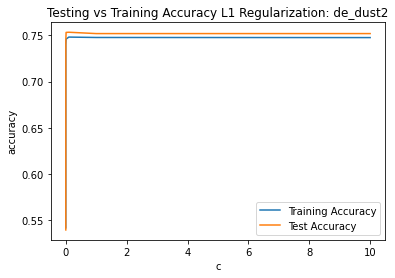

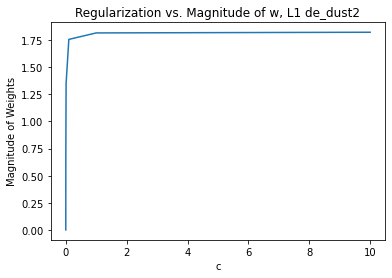

Accuracy on training data = 0.544966
Accuracy on testing data = 0.549135
Accuracy on training data = 0.732613
Accuracy on testing data = 0.740299
Accuracy on training data = 0.747116
Accuracy on testing data = 0.752058
Accuracy on training data = 0.748292
Accuracy on testing data = 0.750546
Accuracy on training data = 0.748516
Accuracy on testing data = 0.750042
Accuracy on training data = 0.748516
Accuracy on testing data = 0.749706


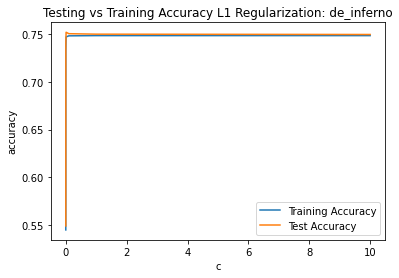

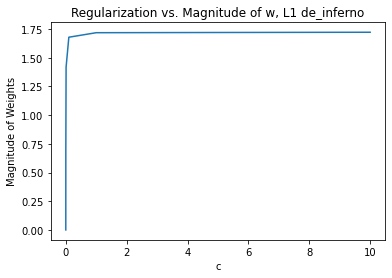

Accuracy on training data = 0.535534
Accuracy on testing data = 0.540887
Accuracy on training data = 0.734931
Accuracy on testing data = 0.738070
Accuracy on training data = 0.745304
Accuracy on testing data = 0.744377
Accuracy on training data = 0.745234
Accuracy on testing data = 0.745848
Accuracy on training data = 0.745024
Accuracy on testing data = 0.746689
Accuracy on training data = 0.745024
Accuracy on testing data = 0.746689


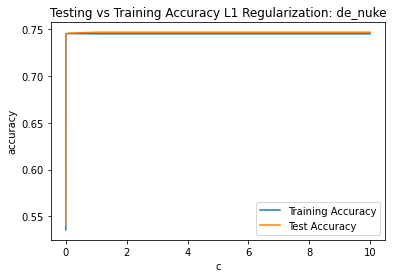

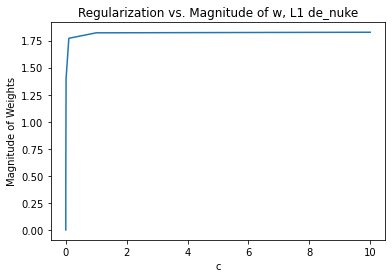

Accuracy on training data = 0.505814
Accuracy on testing data = 0.513566
Accuracy on training data = 0.750646
Accuracy on testing data = 0.740095
Accuracy on training data = 0.756962
Accuracy on testing data = 0.739449
Accuracy on training data = 0.752728
Accuracy on testing data = 0.740095
Accuracy on training data = 0.751794
Accuracy on testing data = 0.738372
Accuracy on training data = 0.751794
Accuracy on testing data = 0.739664


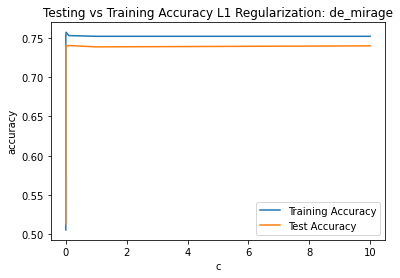

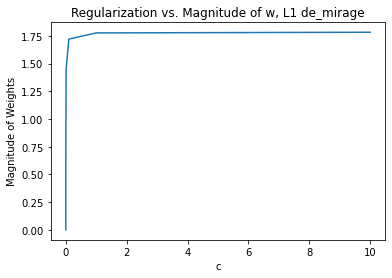

Accuracy on training data = 0.500284
Accuracy on testing data = 0.495030
Accuracy on training data = 0.748295
Accuracy on testing data = 0.746095
Accuracy on training data = 0.758523
Accuracy on testing data = 0.759727
Accuracy on training data = 0.758333
Accuracy on testing data = 0.760863
Accuracy on training data = 0.758239
Accuracy on testing data = 0.762283
Accuracy on training data = 0.757670
Accuracy on testing data = 0.761999


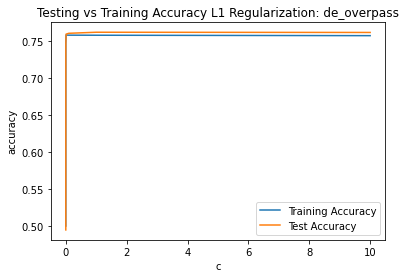

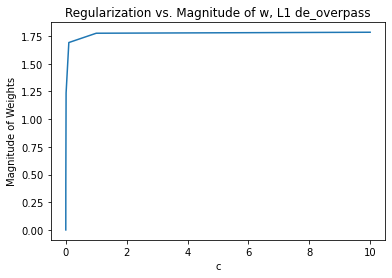

Accuracy on training data = 0.531011
Accuracy on testing data = 0.525314
Accuracy on training data = 0.721624
Accuracy on testing data = 0.724237
Accuracy on training data = 0.757304
Accuracy on testing data = 0.750808
Accuracy on training data = 0.758860
Accuracy on testing data = 0.754399
Accuracy on training data = 0.757543
Accuracy on testing data = 0.752603
Accuracy on training data = 0.757304
Accuracy on testing data = 0.752962


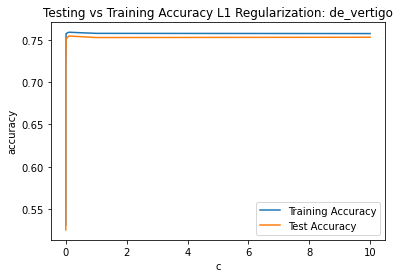

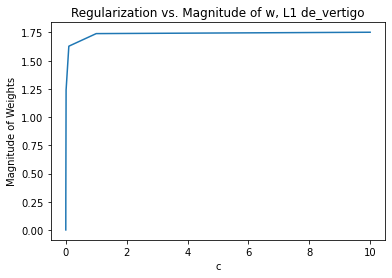

Accuracy on training data = 0.544574
Accuracy on testing data = 0.533650
Accuracy on training data = 0.732951
Accuracy on testing data = 0.739401
Accuracy on training data = 0.751137
Accuracy on testing data = 0.757486
Accuracy on training data = 0.750741
Accuracy on testing data = 0.762229
Accuracy on training data = 0.749951
Accuracy on testing data = 0.760154
Accuracy on training data = 0.749951
Accuracy on testing data = 0.758672


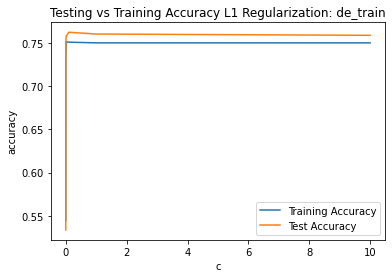

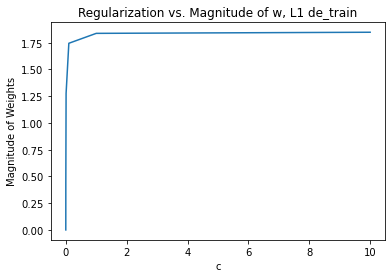

In [7]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
logreg_l1(cVals,df_lst)

In [8]:

def logreg_l2(c_lst, data_lst):
   
    for dataf in df_lst:
        curr_map = dataf.iloc[0,dataf.columns.get_loc('map')]
        plt.clf()
        acc_train_logreg = []
        acc_test_logreg = []
        c_logreg = []   
        w = []
        for c in c_lst:
                logreg = LogisticRegression(C=c)

                Y = np.array(dataf.loc[:, dataf.columns == 'round_winner'])

                df = dataf.drop(["map","round_winner"], axis = 1)


                Y=Y.astype(float)
                scaler = preprocessing.StandardScaler()
                X_scale = scaler.fit_transform(df)
                X_scale=X_scale.astype(float)


                X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=30)
                Y_train = Y_train.reshape(Y_train.shape[0],)
                Y_test = Y_test.reshape(Y_test.shape[0],)

                logreg.fit(X_train, Y_train)
                weights = logreg.coef_

                w.append(np.sqrt(np.sum(np.square(weights))))
                
                Yhat_train= logreg.predict(X_train)
                Yhat_test = logreg.predict(X_test)

                # Find the accuracy achieved on training set using logreg.score and y_train as type of int
                acc_train = accuracy_score(Y_train,Yhat_train)
                print("Accuracy on training data = %f" % acc_train)
                acc_train_logreg.append(acc_train)

                acc_test = accuracy_score(Y_test,Yhat_test)
                print("Accuracy on testing data = %f" % acc_test)
                acc_test_logreg.append(acc_test)
                c_logreg.append(c)

        plt.plot(c_logreg, acc_train_logreg)
        plt.plot(c_logreg, acc_test_logreg)

        plt.title("Testing vs Training Accuracy L2 Regularization: %s" % curr_map)
        plt.xlabel("c")
        plt.ylabel("accuracy")

                # Use the following function to have a legend
        plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
        plt.savefig("LogReg L2 Reg %s" % curr_map)
        plt.show()
        
        plt.plot(c_logreg, w)
        plt.title("Regularization vs. Magnitude of w, L2  %s" % curr_map)
        plt.xlabel("c")
        plt.ylabel("Magnitude of Weights")
        plt.savefig("Regularization vs. Magnitude of w, L2 %s" % curr_map, format = 'png')
        plt.show()
        

Accuracy on training data = 0.737295
Accuracy on testing data = 0.736272
Accuracy on training data = 0.749458
Accuracy on testing data = 0.754697
Accuracy on training data = 0.748254
Accuracy on testing data = 0.750903
Accuracy on training data = 0.747652
Accuracy on testing data = 0.752348
Accuracy on training data = 0.747712
Accuracy on testing data = 0.751806
Accuracy on training data = 0.747652
Accuracy on testing data = 0.751987


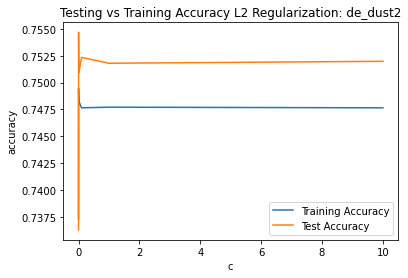

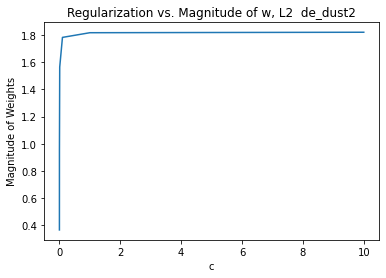

Accuracy on training data = 0.731325
Accuracy on testing data = 0.737107
Accuracy on training data = 0.748460
Accuracy on testing data = 0.756593
Accuracy on training data = 0.747844
Accuracy on testing data = 0.751386
Accuracy on training data = 0.747956
Accuracy on testing data = 0.750042
Accuracy on training data = 0.748460
Accuracy on testing data = 0.749706
Accuracy on training data = 0.748516
Accuracy on testing data = 0.749706


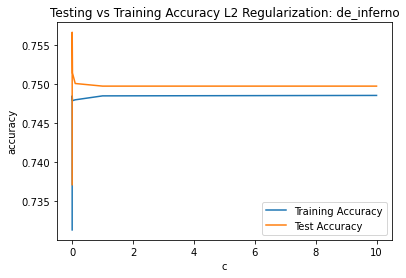

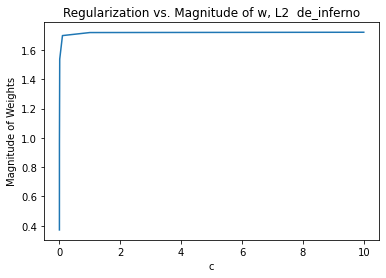

Accuracy on training data = 0.733249
Accuracy on testing data = 0.735968
Accuracy on training data = 0.745795
Accuracy on testing data = 0.740593
Accuracy on training data = 0.747407
Accuracy on testing data = 0.747950
Accuracy on training data = 0.745094
Accuracy on testing data = 0.746479
Accuracy on training data = 0.745024
Accuracy on testing data = 0.746689
Accuracy on training data = 0.745024
Accuracy on testing data = 0.746689


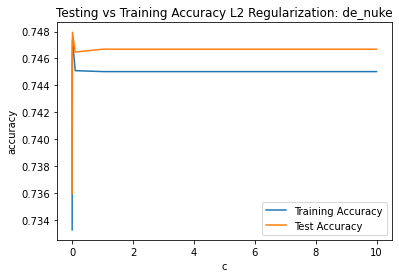

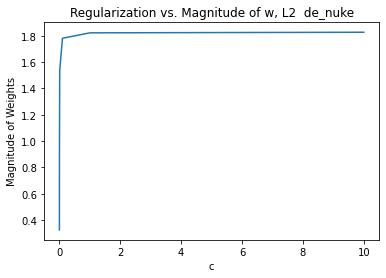

Accuracy on training data = 0.743181
Accuracy on testing data = 0.734711
Accuracy on training data = 0.752871
Accuracy on testing data = 0.741602
Accuracy on training data = 0.751794
Accuracy on testing data = 0.742463
Accuracy on training data = 0.751866
Accuracy on testing data = 0.739449
Accuracy on training data = 0.751723
Accuracy on testing data = 0.739664
Accuracy on training data = 0.751723
Accuracy on testing data = 0.739664


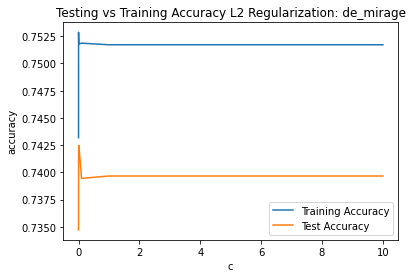

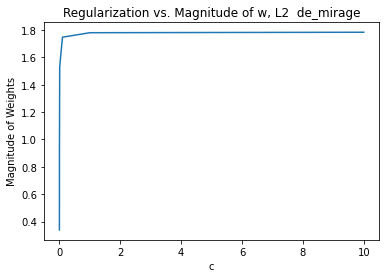

Accuracy on training data = 0.748011
Accuracy on testing data = 0.750355
Accuracy on training data = 0.760795
Accuracy on testing data = 0.758591
Accuracy on training data = 0.760606
Accuracy on testing data = 0.761715
Accuracy on training data = 0.759186
Accuracy on testing data = 0.763419
Accuracy on training data = 0.758144
Accuracy on testing data = 0.763135
Accuracy on training data = 0.757670
Accuracy on testing data = 0.761999


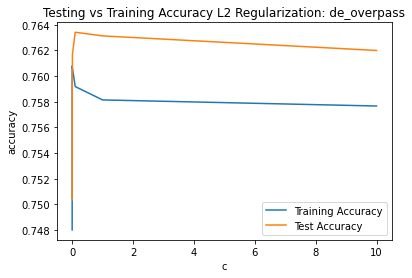

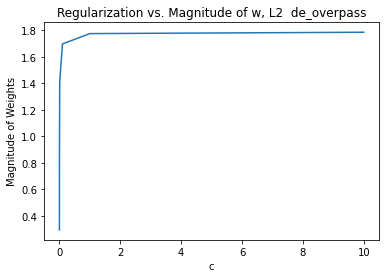

Accuracy on training data = 0.740781
Accuracy on testing data = 0.750808
Accuracy on training data = 0.757064
Accuracy on testing data = 0.748654
Accuracy on training data = 0.759219
Accuracy on testing data = 0.751885
Accuracy on training data = 0.757423
Accuracy on testing data = 0.754039
Accuracy on training data = 0.757184
Accuracy on testing data = 0.752962
Accuracy on training data = 0.757304
Accuracy on testing data = 0.752962


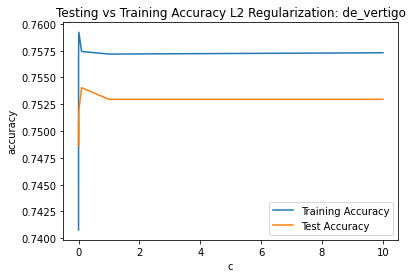

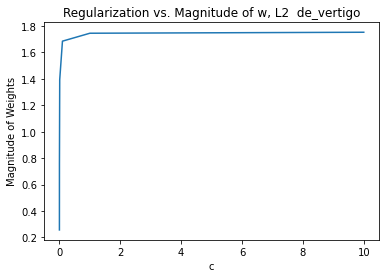

Accuracy on training data = 0.732754
Accuracy on testing data = 0.733472
Accuracy on training data = 0.748270
Accuracy on testing data = 0.749481
Accuracy on training data = 0.752520
Accuracy on testing data = 0.756893
Accuracy on training data = 0.750544
Accuracy on testing data = 0.758968
Accuracy on training data = 0.750049
Accuracy on testing data = 0.758968
Accuracy on training data = 0.750049
Accuracy on testing data = 0.758672


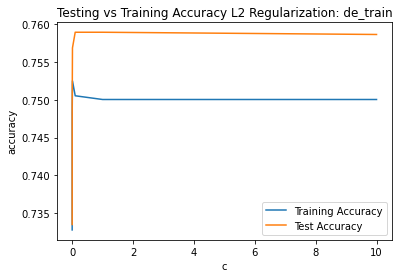

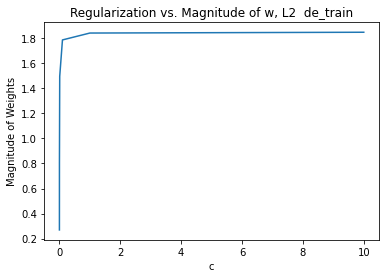

In [9]:
logreg_l2(cVals,df_lst)

In [10]:

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)


def logreg_poly(c_lst, data_lst):
   
    for dataf in df_lst:
        curr_map = dataf.iloc[0,dataf.columns.get_loc('map')]
        plt.clf()
        acc_train_logreg = []
        acc_test_logreg = []
        c_logreg = []   
        w = []
        for c in c_lst:
                logreg = LogisticRegression(penalty = 'l1',C=c, solver = 'saga', max_iter=10000)

                Y = np.array(dataf.loc[:, dataf.columns == 'round_winner'])

                df = dataf.drop(["map","round_winner"], axis = 1)


                Y=Y.astype(float)


                X = np.array(df)


                X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=30)
                X_transformed_train = poly.fit_transform(X_train)
                X_transformed_test = poly.fit_transform(X_test)
                Y_train = Y_train.reshape(Y_train.shape[0],)
                Y_test = Y_test.reshape(Y_test.shape[0],)

                logreg.fit(X_train, Y_train)
                weights = logreg.coef_

                w.append(np.sqrt(np.sum(np.square(weights))))
                
                Yhat_train= logreg.predict(X_train)
                Yhat_test = logreg.predict(X_test)

                # Find the accuracy achieved on training set using logreg.score and y_train as type of int
                acc_train = accuracy_score(Y_train,Yhat_train)
                print("Accuracy on training data = %f" % acc_train)
                acc_train_logreg.append(acc_train)

                acc_test = accuracy_score(Y_test,Yhat_test)
                print("Accuracy on testing data = %f" % acc_test)
                acc_test_logreg.append(acc_test)
                c_logreg.append(c)

        plt.plot(c_logreg, acc_train_logreg)
        plt.plot(c_logreg, acc_test_logreg)

        plt.title("Testing vs Training Accuracy L1 Regularization Poly: %s" % curr_map)
        plt.xlabel("c")
        plt.ylabel("accuracy")

                # Use the following function to have a legend
        plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
        plt.savefig("LogReg Poly L1 Reg %s" % curr_map)
        plt.show()
        
        plt.plot(c_logreg, w)
        plt.title("Regularization vs. Magnitude of w, Poly L1 %s" % curr_map)
        plt.xlabel("c")
        plt.ylabel("Magnitude of Weights")
        plt.savefig("Regularization vs. Magnitude of w, Poly L1 %s" % curr_map, format = 'png')
        plt.show()


Accuracy on training data = 0.745243
Accuracy on testing data = 0.751084
Accuracy on training data = 0.745002
Accuracy on testing data = 0.750723
Accuracy on training data = 0.744641
Accuracy on testing data = 0.750723
Accuracy on training data = 0.744701
Accuracy on testing data = 0.750903
Accuracy on training data = 0.744641
Accuracy on testing data = 0.750903
Accuracy on training data = 0.744641
Accuracy on testing data = 0.750903


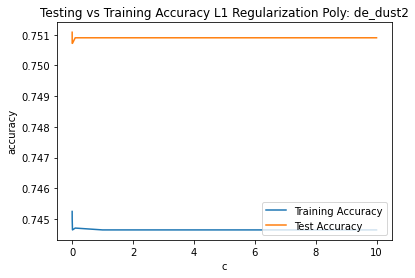

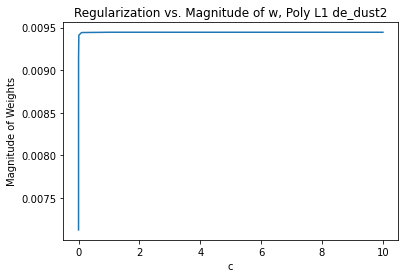

Accuracy on training data = 0.742524
Accuracy on testing data = 0.745674
Accuracy on training data = 0.741012
Accuracy on testing data = 0.745338
Accuracy on training data = 0.741012
Accuracy on testing data = 0.745842
Accuracy on training data = 0.741124
Accuracy on testing data = 0.745842
Accuracy on training data = 0.741124
Accuracy on testing data = 0.746010
Accuracy on training data = 0.741124
Accuracy on testing data = 0.746010


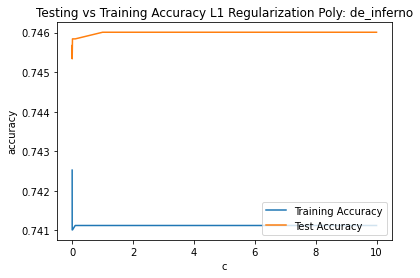

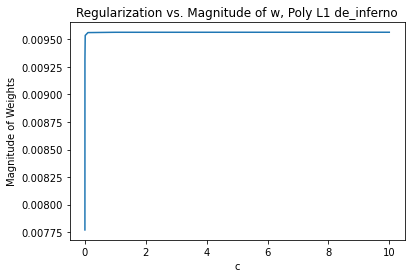

Accuracy on training data = 0.738295
Accuracy on testing data = 0.742905
Accuracy on training data = 0.737034
Accuracy on testing data = 0.743536
Accuracy on training data = 0.737104
Accuracy on testing data = 0.743536
Accuracy on training data = 0.737174
Accuracy on testing data = 0.743536
Accuracy on training data = 0.737174
Accuracy on testing data = 0.743536
Accuracy on training data = 0.737174
Accuracy on testing data = 0.743536


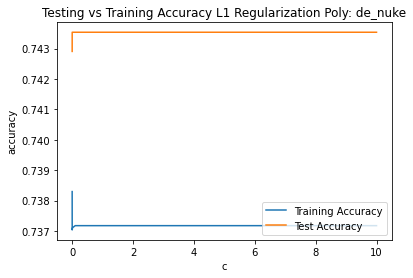

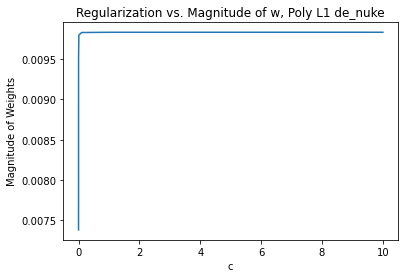

Accuracy on training data = 0.752512
Accuracy on testing data = 0.734281
Accuracy on training data = 0.753374
Accuracy on testing data = 0.733204
Accuracy on training data = 0.753589
Accuracy on testing data = 0.732989
Accuracy on training data = 0.753158
Accuracy on testing data = 0.732773
Accuracy on training data = 0.753158
Accuracy on testing data = 0.732773
Accuracy on training data = 0.753158
Accuracy on testing data = 0.732773


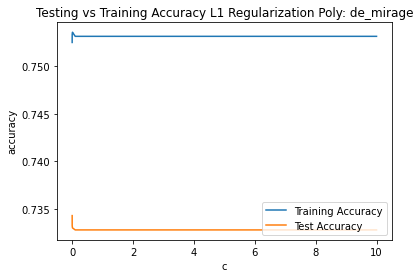

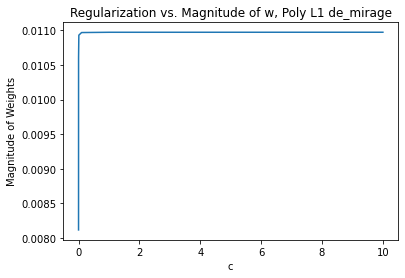

Accuracy on training data = 0.754830
Accuracy on testing data = 0.757455
Accuracy on training data = 0.755587
Accuracy on testing data = 0.759159
Accuracy on training data = 0.755019
Accuracy on testing data = 0.760295
Accuracy on training data = 0.755019
Accuracy on testing data = 0.760295
Accuracy on training data = 0.755019
Accuracy on testing data = 0.760295
Accuracy on training data = 0.755019
Accuracy on testing data = 0.760295


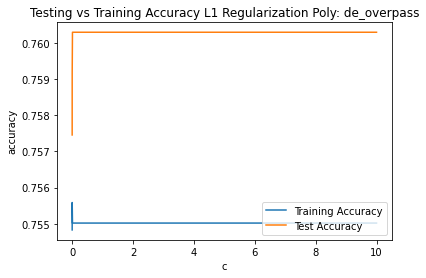

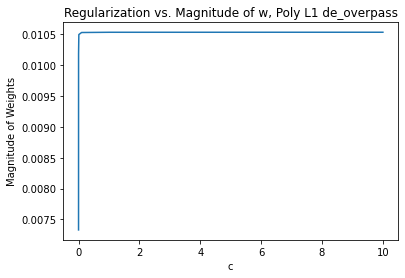

Accuracy on training data = 0.752634
Accuracy on testing data = 0.750449
Accuracy on training data = 0.752754
Accuracy on testing data = 0.755835
Accuracy on training data = 0.753472
Accuracy on testing data = 0.755835
Accuracy on training data = 0.753233
Accuracy on testing data = 0.755835
Accuracy on training data = 0.753233
Accuracy on testing data = 0.755835
Accuracy on training data = 0.753233
Accuracy on testing data = 0.755835


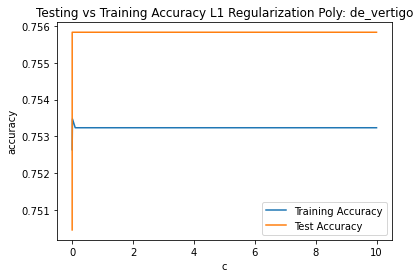

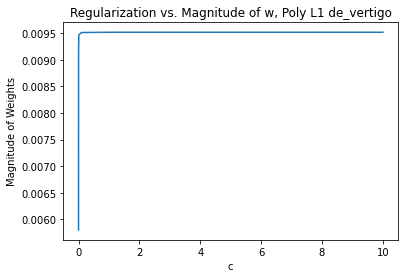

Accuracy on training data = 0.743823
Accuracy on testing data = 0.751260
Accuracy on training data = 0.742143
Accuracy on testing data = 0.752742
Accuracy on training data = 0.740858
Accuracy on testing data = 0.751556
Accuracy on training data = 0.740561
Accuracy on testing data = 0.750964
Accuracy on training data = 0.740561
Accuracy on testing data = 0.750667
Accuracy on training data = 0.740561
Accuracy on testing data = 0.750667


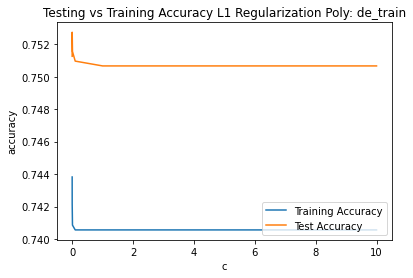

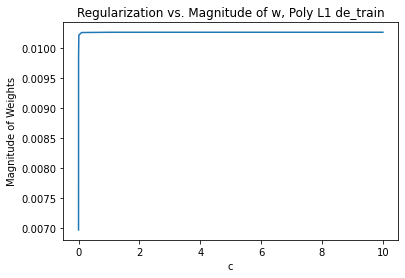

In [11]:
logreg_poly(cVals,df_lst)

In [12]:
def logreg_poly2(c_lst, data_lst):
   
    for dataf in df_lst:
        curr_map = dataf.iloc[0,dataf.columns.get_loc('map')]
        plt.clf()
        acc_train_logreg = []
        acc_test_logreg = []
        c_logreg = []  
        w = []
        for c in c_lst:
                logreg = LogisticRegression(C=c, max_iter=10000)

                Y = np.array(dataf.loc[:, dataf.columns == 'round_winner'])

                df = dataf.drop(["map","round_winner"], axis = 1)


                Y=Y.astype(float)


                X = np.array(df)


                X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=30)
                X_transformed_train = poly.fit_transform(X_train)
                X_transformed_test = poly.fit_transform(X_test)
                Y_train = Y_train.reshape(Y_train.shape[0],)
                Y_test = Y_test.reshape(Y_test.shape[0],)

                logreg.fit(X_train, Y_train)
                weights = logreg.coef_

                w.append(np.sqrt(np.sum(np.square(weights))))
                
                Yhat_train= logreg.predict(X_train)
                Yhat_test = logreg.predict(X_test)

                # Find the accuracy achieved on training set using logreg.score and y_train as type of int
                acc_train = accuracy_score(Y_train,Yhat_train)
                print("Accuracy on training data = %f" % acc_train)
                acc_train_logreg.append(acc_train)

                acc_test = accuracy_score(Y_test,Yhat_test)
                print("Accuracy on testing data = %f" % acc_test)
                acc_test_logreg.append(acc_test)
                c_logreg.append(c)

        plt.plot(c_logreg, acc_train_logreg)
        plt.plot(c_logreg, acc_test_logreg)

        plt.title("Testing vs Training Accuracy L2 Regularization Poly: %s" % curr_map)
        plt.xlabel("c")
        plt.ylabel("accuracy")

                # Use the following function to have a legend
        plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
        plt.savefig("LogReg Poly L2 Reg Poly %s"% curr_map)
        plt.show()
        
        plt.plot(c_logreg, w)
        plt.title("Regularization vs. Magnitude of w, Poly L2 %s" % curr_map)
        plt.xlabel("c")
        plt.ylabel("Magnitude of Weights")
        plt.savefig("Regularization vs. Magnitude of w, Poly L2 %s" % curr_map, format = 'png')
        plt.show()
        


Accuracy on training data = 0.747592
Accuracy on testing data = 0.749097
Accuracy on training data = 0.749157
Accuracy on testing data = 0.746749
Accuracy on training data = 0.748374
Accuracy on testing data = 0.746207
Accuracy on training data = 0.748856
Accuracy on testing data = 0.744581
Accuracy on training data = 0.748916
Accuracy on testing data = 0.745484
Accuracy on training data = 0.748434
Accuracy on testing data = 0.744762


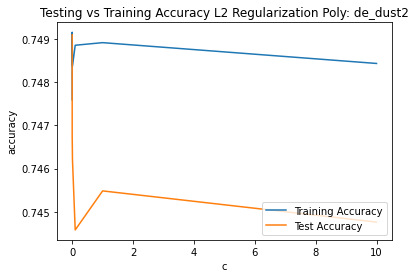

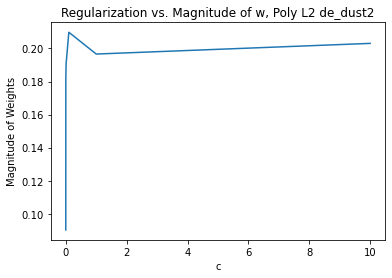

Accuracy on training data = 0.742300
Accuracy on testing data = 0.750210
Accuracy on training data = 0.742188
Accuracy on testing data = 0.747858
Accuracy on training data = 0.742356
Accuracy on testing data = 0.747354
Accuracy on training data = 0.742916
Accuracy on testing data = 0.746346
Accuracy on training data = 0.742132
Accuracy on testing data = 0.746514
Accuracy on training data = 0.742020
Accuracy on testing data = 0.746178


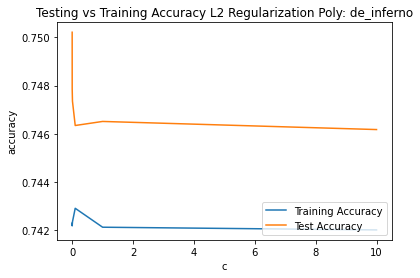

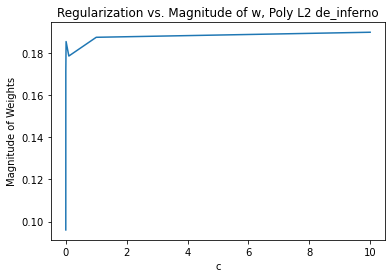

Accuracy on training data = 0.742080
Accuracy on testing data = 0.745638
Accuracy on training data = 0.743973
Accuracy on testing data = 0.748161
Accuracy on training data = 0.745304
Accuracy on testing data = 0.745218
Accuracy on training data = 0.744533
Accuracy on testing data = 0.749212
Accuracy on training data = 0.738085
Accuracy on testing data = 0.741644
Accuracy on training data = 0.739627
Accuracy on testing data = 0.741223


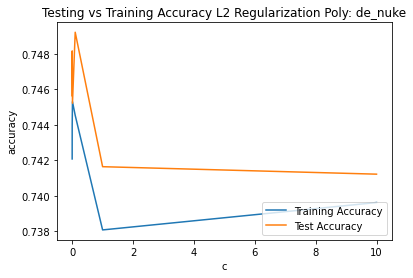

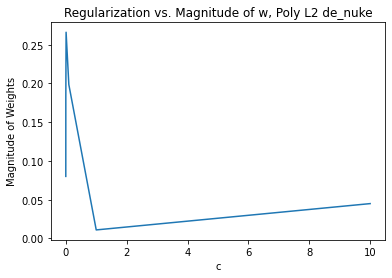

Accuracy on training data = 0.753015
Accuracy on testing data = 0.740095
Accuracy on training data = 0.753732
Accuracy on testing data = 0.740956
Accuracy on training data = 0.754809
Accuracy on testing data = 0.744832
Accuracy on training data = 0.754378
Accuracy on testing data = 0.745263
Accuracy on training data = 0.755024
Accuracy on testing data = 0.745047
Accuracy on training data = 0.754522
Accuracy on testing data = 0.744401


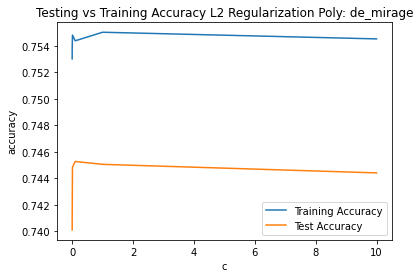

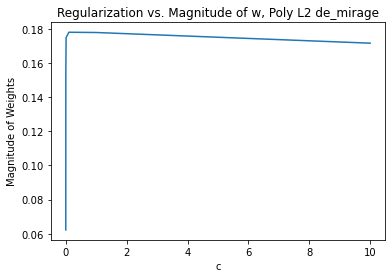

Accuracy on training data = 0.757386
Accuracy on testing data = 0.760295
Accuracy on training data = 0.755966
Accuracy on testing data = 0.760295
Accuracy on training data = 0.755966
Accuracy on testing data = 0.760295
Accuracy on training data = 0.755966
Accuracy on testing data = 0.760295
Accuracy on training data = 0.755966
Accuracy on testing data = 0.761715
Accuracy on training data = 0.755966
Accuracy on testing data = 0.760295


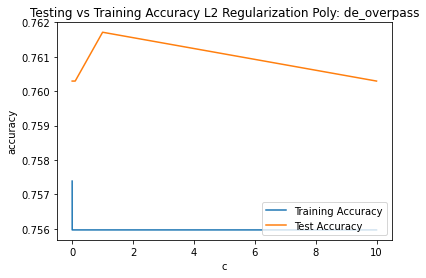

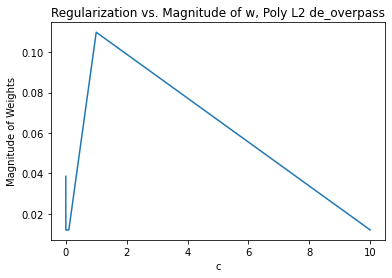

Accuracy on training data = 0.756226
Accuracy on testing data = 0.751167
Accuracy on training data = 0.754430
Accuracy on testing data = 0.754758
Accuracy on training data = 0.755627
Accuracy on testing data = 0.755117
Accuracy on training data = 0.755508
Accuracy on testing data = 0.755835
Accuracy on training data = 0.756226
Accuracy on testing data = 0.755117
Accuracy on training data = 0.756466
Accuracy on testing data = 0.755835


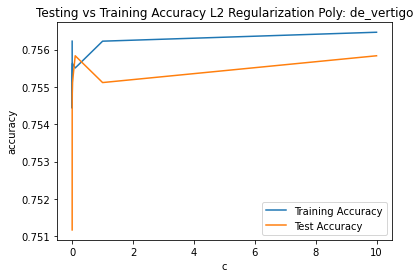

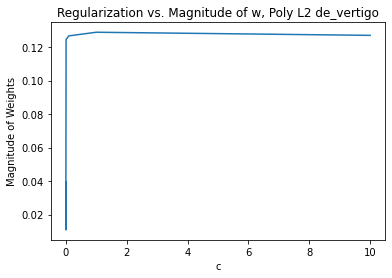

Accuracy on training data = 0.744021
Accuracy on testing data = 0.756597
Accuracy on training data = 0.749654
Accuracy on testing data = 0.760451
Accuracy on training data = 0.747974
Accuracy on testing data = 0.758375
Accuracy on training data = 0.743428
Accuracy on testing data = 0.753039
Accuracy on training data = 0.747282
Accuracy on testing data = 0.758672
Accuracy on training data = 0.746986
Accuracy on testing data = 0.758968


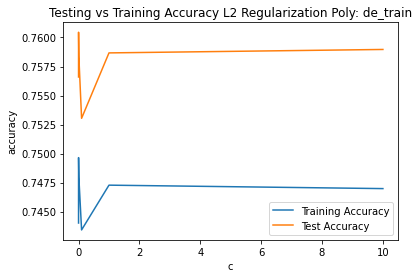

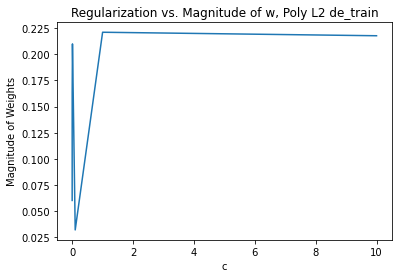

In [13]:
logreg_poly2(cVals,df_lst)